<a href="https://colab.research.google.com/github/amthreeh/healthnutrition/blob/main/%5Bhr%5D_elderly_people.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [ ]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
%cd /content/drive/MyDrive/nationalhealth-main

/content/drive/MyDrive/nationalhealth-main


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nationalhealth-main/nationalhealth_2010to2021.csv')

In [ ]:
all_df = pd.read_csv('/content/drive/MyDrive/elderly people classification/전체독거노인.csv')
region_old_g = pd.read_csv('/content/drive/MyDrive/elderly people classification/지역별 독거노인들.csv')
region_not_old_g = pd.read_csv('/content/drive/MyDrive/elderly people classification/지역별 독거노인이 아닌사람들.csv')

In [ ]:
all_df.columns.tolist()

['Unnamed: 0',
 'ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',

In [ ]:
all_df.head()

,Unnamed: 0,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,33,b'A326339801',b'A3263398',2010.0,1.0,1.0,2.0,74.0,3.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
1,56,b'A338719801',b'A3387198',2010.0,1.0,1.0,2.0,75.0,2.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,75,b'B309840901',b'B3098409',2010.0,2.0,1.0,2.0,65.0,2.0,1.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,76,b'B310600901',b'B3106009',2010.0,2.0,1.0,2.0,79.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
4,80,b'B311840901',b'B3118409',2010.0,2.0,1.0,2.0,75.0,3.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [ ]:
all_df.shape

(2483, 123)

In [ ]:
region_old_g.head()

,Unnamed: 0,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,33,b'A326339801',b'A3263398',2010.0,1.0,1.0,2.0,74.0,3.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
1,56,b'A338719801',b'A3387198',2010.0,1.0,1.0,2.0,75.0,2.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,427,b'A350972901',b'A3509729',2011.0,1.0,1.0,2.0,71.0,2.0,1.0,...,1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,-1.0
3,464,b'A352419801',b'A3524198',2011.0,1.0,1.0,2.0,72.0,4.0,2.0,...,1.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
4,488,b'A353559801',b'A3535598',2011.0,1.0,1.0,2.0,72.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [ ]:
region_old_g.shape

(2483, 123)

In [ ]:
region_not_old_g.head()

,Unnamed: 0,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,5,b'A310980901',b'A3109809',2010.0,1.0,1.0,1.0,80.0,1.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [ ]:
region_not_old_g.shape

(31341, 123)

In [ ]:
region_old_g.loc[region_old_g['region'] == 1, 'region'] = '서울'
region_old_g.loc[region_old_g['region'] == 2, 'region'] = '부산'
region_old_g.loc[region_old_g['region'] == 3, 'region'] = '대구'
region_old_g.loc[region_old_g['region'] == 4, 'region'] = '인천'
region_old_g.loc[region_old_g['region'] == 5, 'region'] = '광주'
region_old_g.loc[region_old_g['region'] == 6, 'region'] = '대전'
region_old_g.loc[region_old_g['region'] == 7, 'region'] = '울산'
region_old_g.loc[region_old_g['region'] == 8, 'region'] = '세종'
region_old_g.loc[region_old_g['region'] == 9, 'region'] = '경기'
region_old_g.loc[region_old_g['region'] == 10, 'region'] = '강원'
region_old_g.loc[region_old_g['region'] == 11, 'region'] = '충북'
region_old_g.loc[region_old_g['region'] == 12, 'region'] = '충남'
region_old_g.loc[region_old_g['region'] == 13, 'region'] = '전북'
region_old_g.loc[region_old_g['region'] == 14, 'region'] = '전남'
region_old_g.loc[region_old_g['region'] == 15, 'region'] = '경북'
region_old_g.loc[region_old_g['region'] == 16, 'region'] = '경남'
region_old_g.loc[region_old_g['region'] == 17, 'region'] = '제주'
     

In [ ]:
region_not_old_g.loc[region_not_old_g['region'] == 1, 'region'] = '서울'
region_not_old_g.loc[region_not_old_g['region'] == 2, 'region'] = '부산'
region_not_old_g.loc[region_not_old_g['region'] == 3, 'region'] = '대구'
region_not_old_g.loc[region_not_old_g['region'] == 4, 'region'] = '인천'
region_not_old_g.loc[region_not_old_g['region'] == 5, 'region'] = '광주'
region_not_old_g.loc[region_not_old_g['region'] == 6, 'region'] = '대전'
region_not_old_g.loc[region_not_old_g['region'] == 7, 'region'] = '울산'
region_not_old_g.loc[region_not_old_g['region'] == 8, 'region'] = '세종'
region_not_old_g.loc[region_not_old_g['region'] == 9, 'region'] = '경기'
region_not_old_g.loc[region_not_old_g['region'] == 10, 'region'] = '강원'
region_not_old_g.loc[region_not_old_g['region'] == 11, 'region'] = '충북'
region_not_old_g.loc[region_not_old_g['region'] == 12, 'region'] = '충남'
region_not_old_g.loc[region_not_old_g['region'] == 13, 'region'] = '전북'
region_not_old_g.loc[region_not_old_g['region'] == 14, 'region'] = '전남'
region_not_old_g.loc[region_not_old_g['region'] == 15, 'region'] = '경북'
region_not_old_g.loc[region_not_old_g['region'] == 16, 'region'] = '경남'
region_not_old_g.loc[region_not_old_g['region'] == 17, 'region'] = '제주'
     

#독거노인

In [ ]:
columns = ['incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt','LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
  'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 'HE_Uket',
 'HE_Ubil',
 'HE_Ubld',
 'HE_Uro',
 'HE_Ucrea',
 'N_INTK',
 'N_EN',
 'N_WATER',
 'N_PROT',
 'N_FAT',
 'N_CHO',
 'N_CA',
 'N_PHOS',
 'N_FE',
 'N_NA',
 'N_K',
 'N_CAROT',
 'N_RETIN',
 'N_B1',
 'N_B2',
 'N_NIAC',
 'N_VITC',
 '비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

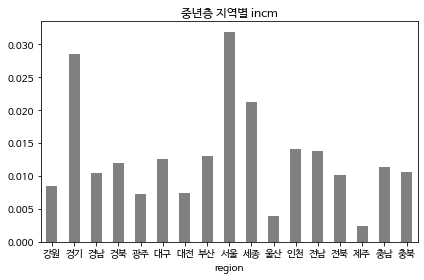

In [ ]:
young.plot(color='grey', kind='bar', rot=0)
plt.title("중년층 지역별 incm")
plt.tight_layout()

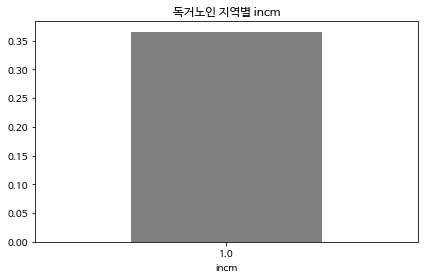

In [ ]:
old.plot(color='grey', kind='bar', rot=0)
plt.title("독거노인 지역별 incm")
plt.tight_layout()

In [ ]:
young = region_not_old_g[region_not_old_g['골관절염']==1].groupby('region').골관절염.size()/len(region_not_old_g['region'])
old = region_old_g[region_old_g['골관절염']==1].groupby('region').골관절염.size()/len(region_old_g['region'])

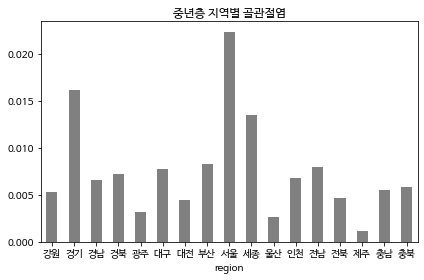

In [ ]:
young.plot(color='grey', kind='bar', rot=0)
plt.title("중년층 지역별 {}".format(feature))
plt.tight_layout()

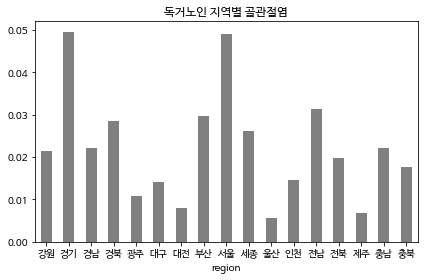

In [ ]:
old.plot(color='grey', kind='bar', rot=0)
plt.title("독거노인 지역별 {}".format(feature))
plt.tight_layout()

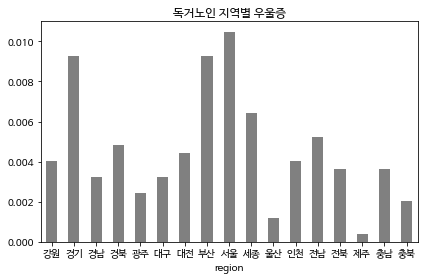

In [ ]:
depression = region_old_g[region_old_g['우울증']==1].groupby('region').우울증.size()/len(region_old_g['region'])
depression.plot(color='grey', kind='bar', rot=0)
plt.title("독거노인 지역별 우울증")
plt.tight_layout()

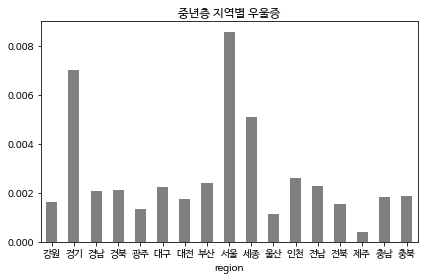

In [ ]:
y_depression = region_not_old_g[region_not_old_g['우울증']==1].groupby('region').우울증.size()/len(region_not_old_g['region'])
y_depression.plot(color='grey', kind='bar', rot=0)
plt.title("중년층 지역별 우울증")
plt.tight_layout()

In [ ]:
def plot_bar(feature):
  plot_region = region_old_g[region_old_g['우울증']==1].groupby('region').우울증.size()/len(region_old_g['region'])
  plot_region.plot(color='grey', kind='bar', rot=0)
  plt.title(feature)
  plt.tight_layout()

In [ ]:
for i in range(len(columns)):
  feature = columns[i]
  plot_bar(feature)

In [ ]:
region = region_df[region_df['당뇨병']==1].groupby('region')['당뇨병'].size()

region.plot(color='grey', kind='bar', rot=0)
plt.title("지역별 당뇨병")
plt.tight_layout()

In [ ]:
region_df.loc[region_df['region']==1, 'region']